In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from helper import *
import os

In [7]:
with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

In [8]:
bad_img_reference_ids = np.load('bad_bleu_score_reference_indexes.npy', allow_pickle=True)

file_id: 4926
/scratch3/hle/refCOCO/imgs_by_id/336764.jpg
{'ref_sents': ['grey', 'grey horse', 'gray horse'], 'label': 19, 'bbox': [[122.25, 53.209999084472656, 260.30999755859375, 479.0]]}


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,horse-1,336764,55463,21050,0.387433,109.621964,65.527893,272.752258,436.364990,0.000624,...,0.002494,0.002494,0.002494,0.002493,0.002494,0.002494,0.002495,0.002496,0.002501,0.002494
1,sky-1,336764,55463,21050,0.090779,0.000000,2.368949,424.479462,65.698029,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002498,0.002493,0.002493
2,woman-1,336764,55463,21050,0.039144,374.698669,161.230057,79.479706,151.296188,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002494,0.002494,0.002506
3,grass-1,336764,55463,21050,0.423360,46.548508,339.746887,433.155701,300.253113,0.000624,...,0.002495,0.002493,0.002494,0.002493,0.002494,0.002493,0.002494,0.002523,0.002493,0.002493
4,head-1,336764,55463,21050,0.054304,50.566574,83.363831,92.815353,179.733582,0.000624,...,0.002495,0.002492,0.002492,0.002492,0.002492,0.002492,0.002498,0.002495,0.002499,0.002494
5,jacket-1,336764,55463,21050,0.015305,375.361511,166.373077,66.920074,70.260162,0.000624,...,0.002493,0.002493,0.002494,0.002493,0.002493,0.002493,0.002495,0.002497,0.002494,0.002494
6,background-1,336764,55463,21050,0.238586,0.000000,1.782616,405.607117,180.701218,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002501,0.002493,0.002494
7,head-2,336764,55463,21050,0.071792,160.432281,59.006039,117.522034,187.661819,0.000624,...,0.002496,0.002494,0.002494,0.002493,0.002493,0.002494,0.002501,0.002499,0.002497,0.002495
8,field-1,336764,55463,21050,0.470315,29.194502,283.153503,446.972626,323.242859,0.000624,...,0.002495,0.002493,0.002494,0.002493,0.002495,0.002493,0.002494,0.002513,0.002494,0.002493
9,rope-1,336764,55463,21050,0.014420,0.000000,122.124191,24.567385,180.309708,0.000624,...,0.002493,0.002491,0.002491,0.002491,0.002491,0.002491,0.002491,0.002492,0.002491,0.002491


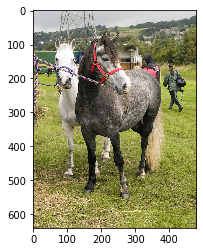

In [9]:
file_id = 4926#np.random.choice(bad_img_reference_ids)
print(f'file_id: {file_id}')
df = pd.read_csv(os.path.join(data_path,f'refCOCO/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
with open(os.path.join(data_path,f'refCOCO/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
print(label)

df

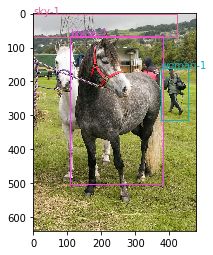

In [10]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in rng[:3]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax = draw_box_obj(name,x,y,w,h,img,ax)

['grey', 'grey horse', 'gray horse']


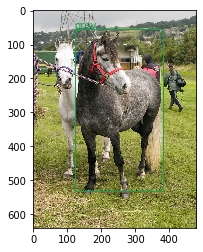

In [11]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [45]:
matched_label = np.load('test_imgs_label_matching.npy', allow_pickle=True)
expressions = {}
start = 0
for i in range(5):
    expressions[i] = np.load(f'top3_exps_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    start += 1000
for i in expressions:
    print(expressions[i].shape)
    
print(expressions[3][:5])
print(expressions[1][:5])
print(expressions[2][:5])
print(expressions[4][:5])

(1000, 3)
(1000, 3)
(1000, 3)
(1000,)
(1000,)
[list(['orange', 'plate', 'concrete']) list(['water', 'table', 'adult'])
 list(['baby', 'shirt', 'socks']) list(['man', 'shirt', 'door'])
 list(['shirt', 'people', 'person'])]
[['man' 'pants' 'pants']
 ['girl' 'girl' 'orange']
 ['woman' 'orange' 'shirt']
 ['adult' 'hand' 'building']
 ['cardboard' 'table' 'fish']]
[['woman' 'shirt' 'hair']
 ['woman' 'hair' 'dog']
 ['person' 'male' 'shirt']
 ['person' 'man' 'woman']
 ['picture' 'wall' 'man']]
[list(['OOV', 'girl', 'hair']) list(['male', 'woman', 'shirt'])
 list(['player', 'OOV', 'players'])
 list(['umbrella', 'umbrellas', 'road'])
 list(['shirt', 'baseball', 'glass'])]


In [23]:
print(matched_label[file_id])

[[0, 'horse-1', 0.8718129297062017], [8, 'field-1', 0.3172788081545888], [3, 'grass-1', 0.24481482535262813], [6, 'background-1', 0.20477748193396972], [7, 'head-2', 0.17687598009871885]]


In [48]:
for i in range(920,930):
    print(expressions[4][i])

['woman', 'coat', 'woman']
['man', 'tshirt', 'tshirt']
['pizza', 'plate', 'stove']
['vehicle', 'car', 'person']
['suit', 'people', 'sand']
['girl', 'man', 'tshirt']
['adult', 'dirt', 'yellow']
['man', 'jacket', 'jacket']
['man', 'dress', 'hair']
['bike', 'lines', 'street']
